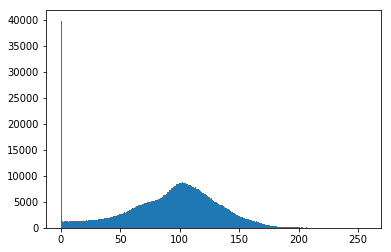

In [272]:
import matplotlib.pyplot as plt
import cv2
from matplotlib.colors import LinearSegmentedColormap
cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red2 = LinearSegmentedColormap('Red2', cdict2)

import numpy as np

import cv2 as cv
from matplotlib import pyplot as plt
from PIL import Image
im = Image.open('Wild124.tif');
width, height=im.size
area = (0, 0, width, height-77 )
im = im.crop(area)

im.save('cropped_Wild124.tif')
img = cv.imread('cropped_Wild124.tif',0)

plt.hist(img.ravel(),256,[0,256])
plt.show()

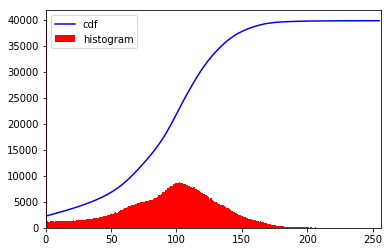

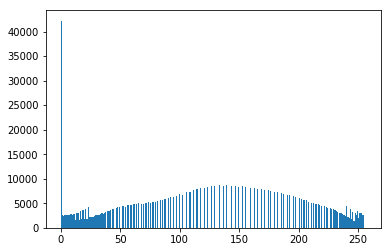

In [273]:
hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]
plt.hist(img2.ravel(),256,[0,256])
plt.show()

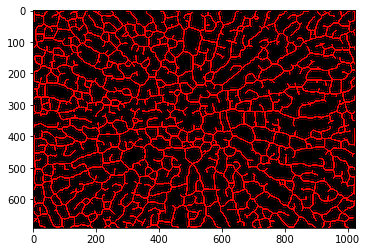

In [274]:
equ = cv2.equalizeHist(img)
ablur = cv2.blur(equ,(13, 13))
a_mthres = cv2.adaptiveThreshold(ablur,1,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,35,4) 

from skimage.morphology import skeletonize
adaptiveskeleton = skeletonize(a_mthres)
#ax = plt.subplot()
#ax.imshow(adaptiveskeleton, cmap=red2, interpolation='sinc')

from skimage.morphology import remove_small_objects
cleanskel=remove_small_objects(adaptiveskeleton, min_size=70, connectivity=3)
plot = plt.subplot()
plot.imshow(cleanskel, cmap=red2, interpolation='sinc') 

/Users/3kh/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


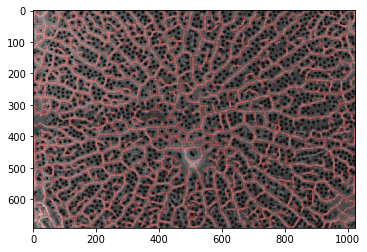

In [275]:
import matplotlib.image as mpimg

imgplot2 = plt.imshow(img,cmap="gray", alpha= .9)

ax2 = plt.subplot()
ax2.imshow(cleanskel, cmap=red2, interpolation='sinc', alpha=0.3) 
plt.show()

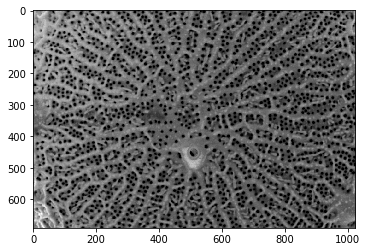

In [276]:
imgplot = plt.imshow(img, cmap='gray')